In [1]:
import utils
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout
from keras.callbacks import EarlyStopping

In [2]:
EPOCHS = 10000
BATCH_SIZE = 32
trading_days = 20
model_type = "GRU"

In [3]:
raw_df = utils.download()
df, x = utils.process(df=raw_df, trading_days=trading_days)
utils.test(x=x)
x, y = utils.convert2matrix(data_arr=x, look_back=20)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
X_train = np.expand_dims(X_train, 2)
x_test = np.expand_dims(X_test, 2)
print(X_train.shape, y_train.shape, x_test.shape, y_test.shape)

ADF Statistic: -6.457758
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
(6533, 20, 1) (6533,) (1634, 20, 1) (1634,)


In [4]:
model = Sequential()
# Input layer
model.add(GRU(10, input_shape=(X_train.shape[1], 1),return_sequences=True))
model.add(Dropout(0.2)) 
# Hidden layer
model.add(GRU(10)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [5]:
early_stop = EarlyStopping(monitor = 'val_mse',
                                               patience = 100)
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    validation_split = 0.2,
    verbose=1,
    shuffle=False,
    callbacks = [early_stop]
)

mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/10000
164/164 [==============================] - 6s 13ms/step - loss: 7.4116e-04 - mse: 7.4116e-04 - val_loss: 3.8802e-04 - val_mse: 3.8802e-04
Epoch 2/10000
164/164 [==============================] - 2s 10ms/step - loss: 4.2501e-04 - mse: 4.2501e-04 - val_loss: 2.7241e-04 - val_mse: 2.7241e-04
Epoch 3/10000
164/164 [==============================] - 1s 8ms/step - loss: 2.5998e-04 - mse: 2.5998e-04 - val_loss: 9.5081e-05 - val_mse: 9.5081e-05
Epoch 4/10000
164/164 [==============================] - 1s 8ms/step - loss: 1.4980e-04 - mse: 1.4980e-04 - val_loss: 3.7327e-05 - val_mse: 3.7327e-05
Epoch 5/10000
164/164 [==============================] - 1s 8ms/step - loss: 9.2256e-05 - mse: 9.2256e-05 - val_loss: 2.5911e-05 - val_mse: 2.5911e-05
Epoch 6/10000
164/164 [==============================] - 1s 8ms/step - loss: 7.6240e-05 - mse: 7.6240e-05 - val_loss: 2.3977e-05 - val_mse: 2.3977e-05
Epoch 7/10000
164/164 [==============================] - 1s 8ms/step - loss: 7.4389e-05 - ms

In [6]:
epochs = range(len(mse))
n_epochs = len(mse)
pred = model.predict(x_test)
prediction = utils.compute_prediction_frame(y_labels=y_test,predicted=pred)

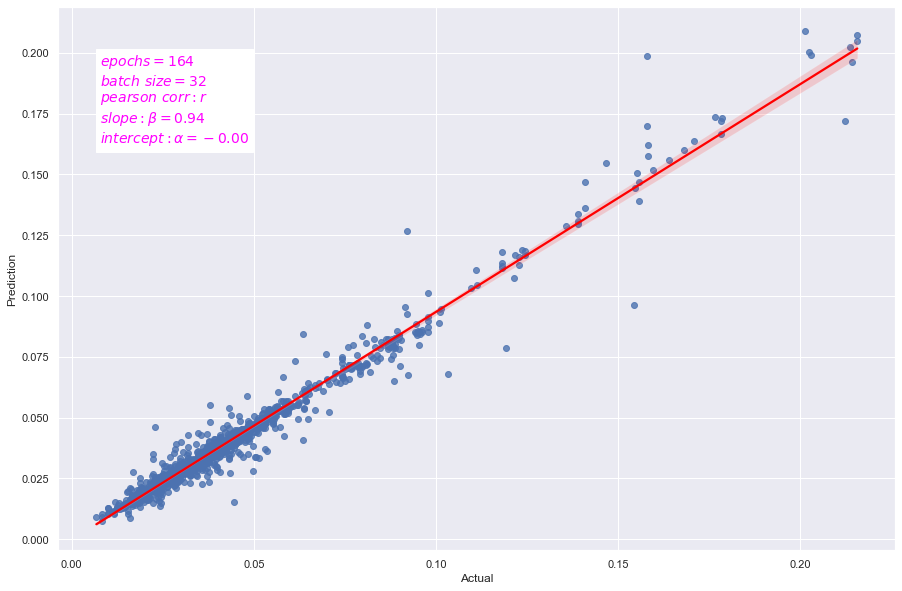

Beta of  Prediction  = 0.9367
Alpha of  Prediction  = -0.0002


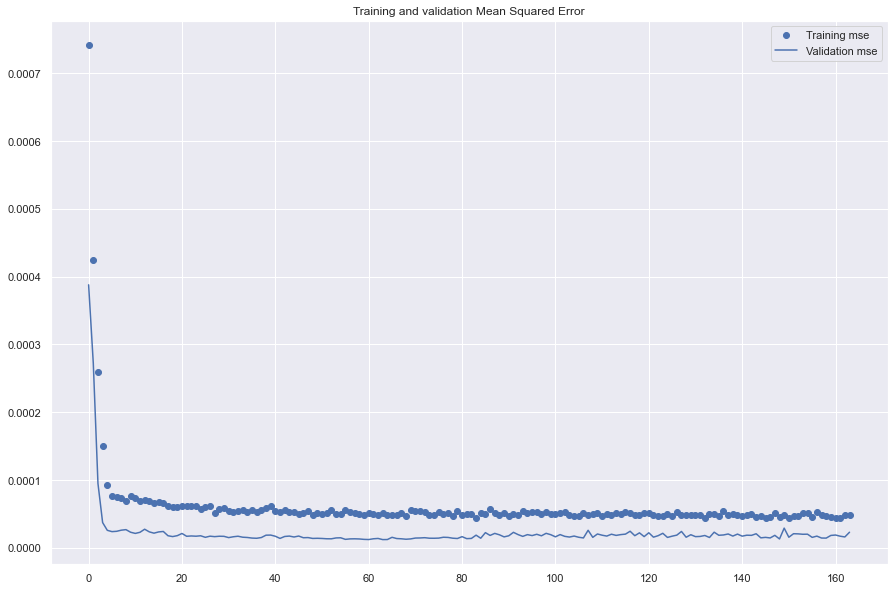

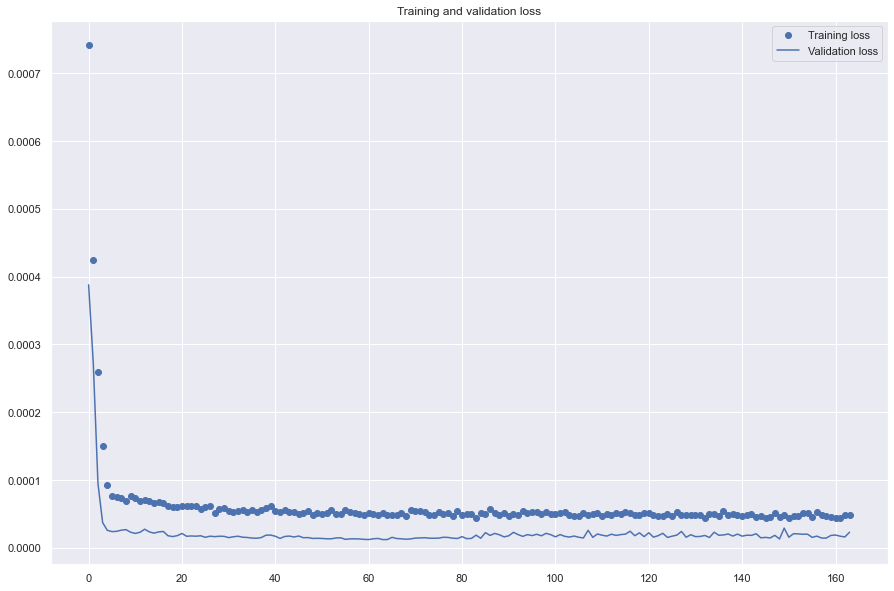

In [7]:
utils.scatterplotRegression(df=prediction, model_type=model_type, EPOCHS=n_epochs,BATCH_SIZE=BATCH_SIZE)
utils.error_evaluation(epochs,mse,val_mse,loss,val_loss)